# KRR for Trajectory-Based Molecular Machine Learning
### Thesis topic: **"CI/CD for trajectory-based molecular machine learning: From training data to models."**
#### Author: Suraj Giri 
#### Supervisor: Prof. Dr. Peter Zaspel
### **Preliminary Dataset** : 10k .xyz files with molecular trajectories of C6H6 molecules and a .dat file with energies for those 10k molecules.

#### Major Tasks:
1. Developing **Kernel Ridge Regression in DVC Structure** 
2. Developing **Testing Software in DVC Structure**
3. Jupyter Notebooks to showcase features of DVC for ML

In [8]:
# importing the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import qml
from qml.kernels import gaussian_kernel

## Preprocessing
Loading the dataset: <br>
All the 10k molecules and their respective energies, as compounds class of QML libray. The task is already done in 'import_dataset.py' and here we only import them from the given file.

In [9]:
# from import_dataset import compounds, energies
# print(compounds[0:10])

In [10]:
# import Dataset
# author: Suraj Giri
# BSc Thesis, CS, Contructor University

import os
import re
import qml
import numpy as np

# Define the folder where the xyz files are located
molcules_folder = '../../dataset/C6H6_molecules/'

# Define the path to the energy .dat file
energy_file = '../../dataset/E_def2-tzvp.dat'

# Get a list of all the xyz filenames in the folder
xyz_files = [f for f in os.listdir(molcules_folder) if f.endswith('.xyz')]

# Sort the filenames based on their molecule number (assuming the filename format is "molecule_X.xyz")
xyz_files.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))

# Load the energies from the .dat file
energies = np.loadtxt(energy_file)
print (energies)

compounds = [qml.Compound(xyz=os.path.join(molcules_folder, xyz_file)) for xyz_file in xyz_files]
print(compounds[0:10])

for mol in compounds:
    mol.properties = energies[compounds.index(mol)]
    # print(mol.name)
    # print(mol.name, mol.properties)

# energy_molecule = np.array([mol.properties for mol in compounds])
# print(energy_molecule)



[5.518798 5.521764 5.524758 ... 5.466634 5.465274 5.46375 ]
[<qml.compound.Compound object at 0x7f07e78b04c0>, <qml.compound.Compound object at 0x7f08843241f0>, <qml.compound.Compound object at 0x7f07e7135f70>, <qml.compound.Compound object at 0x7f07e78a0130>, <qml.compound.Compound object at 0x7f07e71cf310>, <qml.compound.Compound object at 0x7f07e7bc5c70>, <qml.compound.Compound object at 0x7f07e7bc53a0>, <qml.compound.Compound object at 0x7f07e4796a00>, <qml.compound.Compound object at 0x7f07e47969a0>, <qml.compound.Compound object at 0x7f07e4796c40>]


## Feature Engineering
Generating the Coloumb Matrices for every molecule in the dataset.

In [11]:
for mol in compounds:
    mol.generate_coulomb_matrix(size=12, sorting="row-norm")

# making a big 2D array with coloumb matrix of all the molecules
X = np.array([mol.representation for mol in compounds])
print(len(X))
print("Coloumb matrix for first element: \n",X[0])

10000
Coloumb matrix for first element: 
 [36.8581052  12.88475304 36.8581052  14.87814653 25.77010498 36.8581052
 25.77010498 14.87814653 25.76950608 36.8581052  25.77010498 14.87814653
 12.88505249 14.87849231 36.8581052  14.87814653 25.77010498 14.87849231
 12.88505249 25.76950608 36.8581052   5.53505535  1.54718927  1.76372693
  2.78515328  2.78515328  1.76372693  0.5         1.54718927  5.53505535
  2.78515328  1.76372693  1.76372693  2.78515328  0.20153164  0.5
  1.76372297  2.78513771  5.53492949  2.78511003  1.54720534  1.76374382
  0.23270894  0.40306455  0.5         2.78513771  1.76372297  2.78511003
  5.53492949  1.76374382  1.54720534  0.40306455  0.23270894  0.40306328
  0.5         2.78513771  1.76372297  1.54720534  1.76374382  5.53492949
  2.78511003  0.40306455  0.23270894  0.20153228  0.23270967  0.5
  1.76372297  2.78513771  1.76374382  1.54720534  2.78511003  5.53492949
  0.23270894  0.40306455  0.23270967  0.20153228  0.40306328  0.5       ]


## Splitting the Dataset
Here we are following the common split of 80:20. 80% for training and 20% for testing.

In [12]:
# splitting the data into training and test set with 80% and 20% respectively from X
X_train = X[:int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]
Y_train = np.array([mol.properties for mol in compounds[:int(0.8*len(X))]])
Y_test = energies[int(0.8*len(X)):]

print("Training set: ")
print(X_train)
print(X_train.shape)
print(Y_train)
print(Y_train.shape)

print("\n")
print("Testing set: ")
print(X_test)
print(X_test.shape)
print(Y_test)
print(Y_test.shape)

Training set: 
[[36.8581052  12.88475304 36.8581052  ...  0.20153228  0.40306328
   0.5       ]
 [36.8581052  25.80544813 36.8581052  ...  0.40304174  0.2013175
   0.5       ]
 [36.8581052  25.84224154 36.8581052  ...  0.40300293  0.20109353
   0.5       ]
 ...
 [36.8581052  14.82299354 36.8581052  ...  0.23152695  0.1990727
   0.5       ]
 [36.8581052  14.827238   36.8581052  ...  0.23152757  0.19908694
   0.5       ]
 [36.8581052  14.83151007 36.8581052  ...  0.23152528  0.19910532
   0.5       ]]
(8000, 78)
[5.518798 5.521764 5.524758 ... 5.345108 5.336727 5.3287  ]
(8000,)


Testing set: 
[[36.8581052  14.83565657 36.8581052  ...  0.23152019  0.1991276
   0.5       ]
 [36.8581052  14.83981207 36.8581052  ...  0.23151186  0.19915356
   0.5       ]
 [36.8581052  14.84406172 36.8581052  ...  0.2315001   0.19918428
   0.5       ]
 ...
 [36.8581052  26.0098089  36.8581052  ...  0.38992388  0.23073636
   0.5       ]
 [36.8581052  26.0088676  36.8581052  ...  0.38985784  0.23101973
   0.5

## Model Selection:
For now I am choosing Gaussian Kernel:
$$ K_{ij} = \exp\left(-\frac{\left(\left\lVert X_i - X_j \right\rVert_2^2\right)}{2 \sigma^2}\right) $$

In [13]:
# Defining the Kernel width
sigma = 200.0

# Defining the Kernel K as a numpy array for the training set
K = gaussian_kernel(X_train, X_train, sigma)

print(K.shape)
print(K)

(8000, 8000)
[[1.         0.98113963 0.98113662 ... 0.98857382 0.98858013 0.98858661]
 [0.98113963 1.         0.99999996 ... 0.99217802 0.99218332 0.99218918]
 [0.98113662 0.99999996 1.         ... 0.99217867 0.99218398 0.99218985]
 ...
 [0.98857382 0.99217802 0.99217867 ... 1.         0.99999994 0.99999977]
 [0.98858013 0.99218332 0.99218398 ... 0.99999994 1.         0.99999994]
 [0.98858661 0.99218918 0.99218985 ... 0.99999977 0.99999994 1.        ]]


## KRR model using QML
#### Regression Coefficient:
$$ \alpha = (K + \lambda I)^{-1} y $$

In [14]:
# Adding a small lambda to the diagonal of the kernel matrix for "Ridge Regularization"
K[np.diag_indices_from(K)] += 1e-8

# Solving the linear system of equations using the Cholesky decomposition
from qml.math import cho_solve
alpha = cho_solve(K, Y_train)

print("Alpha: ")
print(alpha)
print(alpha.shape)

Alpha: 
[955532.01824661 592402.82404285 603578.02447469 ...  69767.72733159
  87238.44928892  91691.52249253]
(8000,)


### Prediction using KRR:
$$ y(\widetilde{X}) = \sum_{=1}^{N_T} \alpha_i K (\widetilde{X}, {X_i}) $$

where $ \alpha_i $ is the regression coefficient and $ K (\widetilde{X}, {X_i}) $ is the kernel for the KRR.

In [15]:
# Calculating the kernel matrix between test and training set using same sigma
K_test_train = gaussian_kernel(X_test, X_train, sigma)

# Calculating the predicted energies
Y_pred = np.dot(K_test_train, alpha)
print("Predicted Energies: ")
print(Y_pred)
print(Y_pred.shape)

# Calculating the mean absolute error
MAE = np.mean(np.abs(Y_pred - Y_test))
print("Mean Absolute Error: ", MAE)

Predicted Energies: 
[5.32034482 5.31325534 5.30652765 ... 5.48822593 5.48630066 5.48579796]
(2000,)
Mean Absolute Error:  0.018539126624306207


Plot the following graphs <br>
- loglog of mae vs training samples

In [16]:
# Generating the list of MAE for learning curve
# Taking 10%, 20%, 30%, 40%, 50%, 60%, 70% of the training set
MAE_list = []
X_train_subset_size = []
for i in range(1,8):
    X_train_subset = X[:int(i*0.1*len(X))]
    Y_train_subset = np.array([mol.properties for mol in compounds[:int(i*0.1*len(X))]])
    sigma = 1000.0
    K = gaussian_kernel(X_train_subset, X_train_subset, sigma)
    K[np.diag_indices_from(K)] += 1e-8
    alpha = cho_solve(K, Y_train_subset)
    K_test_train = gaussian_kernel(X_test, X_train_subset, sigma)
    Y_pred = np.dot(K_test_train, alpha)
    MAE = np.mean(np.abs(Y_pred - Y_test))
    MAE_list.append(MAE)
    X_train_subset_size.append(X_train_subset.shape[0])
    # print("For Each Iteration ", i )
    # print("Alpha: ", alpha)
    # print("Alpha Shape: ", alpha.shape)
    print(X_train_subset.shape[0])
    print("MAE: ", MAE)

print("X_train_subset_size: \n", X_train_subset_size)
print("MAE List: \n", MAE_list)



1000
MAE:  0.024728296354961828
2000
MAE:  0.024029262297753814
3000
MAE:  0.023292682061775687
4000
MAE:  0.02341146179155349
5000
MAE:  0.02372622399708938
6000
MAE:  0.02247903201673817
7000
MAE:  0.019862854037204742
X_train_subset_size: 
 [1000, 2000, 3000, 4000, 5000, 6000, 7000]
MAE List: 
 [0.024728296354961828, 0.024029262297753814, 0.023292682061775687, 0.02341146179155349, 0.02372622399708938, 0.02247903201673817, 0.019862854037204742]


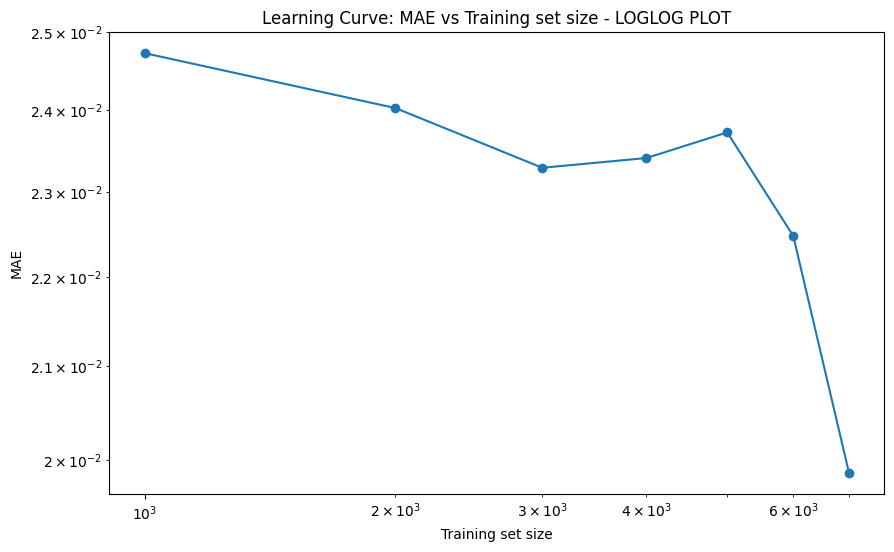

In [17]:
# Plotting the loglog plot of learning curve of MAE vs training set sizes
plt.figure(figsize=(10, 6))
plt.loglog(X_train_subset_size, MAE_list, 'o-')
plt.xlabel('Training set size')
plt.ylabel('MAE')
plt.title('Learning Curve: MAE vs Training set size - LOGLOG PLOT')
plt.show()

In [18]:
# avg_mae_array = np.zeros((13,))
# for j in range(1, 10):
#     for i in range(1, 20):
#         N = pow(2, i)
#         if N > 10000:
#             break
#         X_train_copy = X_train.copy()
#         Y_train_copy = Y_train.copy()
#         np.random.seed(j)
#         np.random.shuffle(X_train_copy)
#         np.random.seed(j)
#         np.random.shuffle(Y_train_copy)
#         X_train_subset = X_train_copy[:N]
#         Y_train_subset = Y_train_copy[:N]
#         avg_mae = 0
#         X_test = X_copy[9001:10000]
#         y_test = y_copy[9001:10000]
#         avg_mae_array[i-1] += scikit_krr_mae(X_train, y_train, X_test, y_test, 4000, 1e-8)

# scikit_avg_mae_array /= 10